In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x21ea410f610>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0}

In [11]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x21ea408d8b0>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [12]:
for row in session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).limit(15).all():
    print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [14]:
for row in session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).order_by(Measurement.date.desc()).limit(15).all():
    print(row)

(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)
(7635, 'USC00514830', '2017-08-23', 0.0, 82.0)
(12187, 'USC00519523', '2017-08-23', 0.08, 82.0)
(19550, 'USC00516128', '2017-08-23', 0.45, 76.0)
(2723, 'USC00519397', '2017-08-22', 0.0, 82.0)
(12186, 'USC00519523', '2017-08-22', 0.0, 82.0)
(19549, 'USC00516128', '2017-08-22', 0.5, 76.0)
(2722, 'USC00519397', '2017-08-21', 0.0, 81.0)
(7634, 'USC00514830', '2017-08-21', 0.02, 79.0)
(12185, 'USC00519523', '2017-08-21', None, 82.0)
(19548, 'USC00516128', '2017-08-21', 0.56, 76.0)
(2721, 'USC00519397', '2017-08-20', 0.0, 81.0)
(7633, 'USC00514830', '2017-08-20', 0.01, 80.0)
(19547, 'USC00516128', '2017-08-20', None, 78.0)
(2720, 'USC00519397', '2017-08-19', 0.0, 79.0)


In [15]:
# Calculate the date 1 year ago from the last data point in the database
last_date = dt.datetime(2017, 8, 23)
one_year_date = last_date - dt.timedelta(days=365)
print("Last 12 Months: ", one_year_date)

Last 12 Months:  2016-08-23 00:00:00


In [16]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_date).all()
for result in results:
    print(f"Date: {result.date}, Precipitation: {result.prcp}")

Date: 2016-08-24, Precipitation: 0.08
Date: 2016-08-25, Precipitation: 0.08
Date: 2016-08-26, Precipitation: 0.0
Date: 2016-08-27, Precipitation: 0.0
Date: 2016-08-28, Precipitation: 0.01
Date: 2016-08-29, Precipitation: 0.0
Date: 2016-08-30, Precipitation: 0.0
Date: 2016-08-31, Precipitation: 0.13
Date: 2016-09-01, Precipitation: 0.0
Date: 2016-09-02, Precipitation: 0.0
Date: 2016-09-03, Precipitation: 0.0
Date: 2016-09-04, Precipitation: 0.03
Date: 2016-09-05, Precipitation: None
Date: 2016-09-06, Precipitation: None
Date: 2016-09-07, Precipitation: 0.05
Date: 2016-09-08, Precipitation: 0.0
Date: 2016-09-09, Precipitation: 0.03
Date: 2016-09-10, Precipitation: 0.0
Date: 2016-09-11, Precipitation: 0.05
Date: 2016-09-12, Precipitation: 0.0
Date: 2016-09-13, Precipitation: 0.02
Date: 2016-09-14, Precipitation: 1.32
Date: 2016-09-15, Precipitation: 0.42
Date: 2016-09-16, Precipitation: 0.06
Date: 2016-09-17, Precipitation: 0.05
Date: 2016-09-18, Precipitation: 0.0
Date: 2016-09-19, Preci

Date: 2017-03-06, Precipitation: None
Date: 2017-03-09, Precipitation: None
Date: 2017-03-10, Precipitation: 0.0
Date: 2017-03-11, Precipitation: 0.0
Date: 2017-03-12, Precipitation: 0.0
Date: 2017-03-13, Precipitation: 0.0
Date: 2017-03-14, Precipitation: 0.0
Date: 2017-03-15, Precipitation: 0.0
Date: 2017-03-16, Precipitation: 0.0
Date: 2017-03-17, Precipitation: 0.35
Date: 2017-03-18, Precipitation: 0.0
Date: 2017-03-19, Precipitation: 0.0
Date: 2017-03-20, Precipitation: 0.0
Date: 2017-03-21, Precipitation: 0.0
Date: 2017-03-22, Precipitation: 0.0
Date: 2017-03-23, Precipitation: 0.02
Date: 2017-03-24, Precipitation: 0.07
Date: 2017-03-25, Precipitation: 0.43
Date: 2017-03-26, Precipitation: 0.0
Date: 2017-03-27, Precipitation: 0.0
Date: 2017-03-28, Precipitation: 0.0
Date: 2017-03-29, Precipitation: 0.08
Date: 2017-03-30, Precipitation: 0.0
Date: 2017-03-31, Precipitation: 0.0
Date: 2017-04-01, Precipitation: 0.0
Date: 2017-04-02, Precipitation: 0.0
Date: 2017-04-03, Precipitation

Date: 2017-08-05, Precipitation: 0.06
Date: 2017-08-06, Precipitation: 0.0
Date: 2017-08-13, Precipitation: 0.0
Date: 2017-08-14, Precipitation: 0.0
Date: 2017-08-15, Precipitation: 0.32
Date: 2017-08-16, Precipitation: 0.12
Date: 2017-08-17, Precipitation: 0.01
Date: 2017-08-18, Precipitation: 0.06
Date: 2016-08-24, Precipitation: 1.45
Date: 2016-08-25, Precipitation: 0.11
Date: 2016-08-27, Precipitation: None
Date: 2016-08-28, Precipitation: 2.07
Date: 2016-08-29, Precipitation: 0.9
Date: 2016-08-30, Precipitation: 0.05
Date: 2016-08-31, Precipitation: 2.46
Date: 2016-09-01, Precipitation: 0.01
Date: 2016-09-02, Precipitation: 0.03
Date: 2016-09-03, Precipitation: 1.0
Date: 2016-09-04, Precipitation: 0.44
Date: 2016-09-05, Precipitation: 0.18
Date: 2016-09-06, Precipitation: 1.0
Date: 2016-09-07, Precipitation: 1.35
Date: 2016-09-08, Precipitation: 0.15
Date: 2016-09-09, Precipitation: 0.35
Date: 2016-09-10, Precipitation: 1.16
Date: 2016-09-11, Precipitation: 0.6
Date: 2016-09-12, P

In [17]:
print(results[1])

('2016-08-25', 0.08)


In [18]:
#put the data into two lists
date1 = [result[0] for result in results[:10]]
prcp1 = [int(result[1]) for result in results[:10]]

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True, )
# Sort the dataframe by date
df.sort_index
df

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


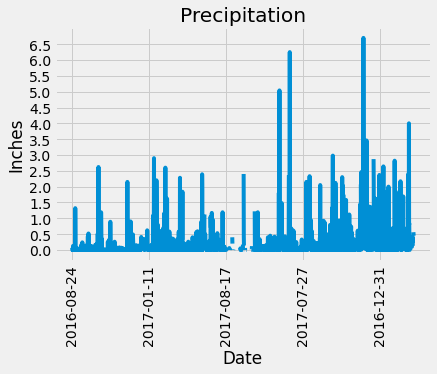

<Figure size 432x432 with 0 Axes>

In [46]:
# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.plot(x='date', y='precipitation', rot=90, legend=False)
plt.yticks(np.arange(0, 7, step=0.5))
plt.title('Precipitation')
plt.ylabel('Inches')
plt.xlabel('Date')
plt.figure(figsize=(6, 6))
plt.show()

In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [100]:
# Perform a query to retrieve the data and precipitation scores
results2 = session.query(Measurement.date, Measurement.prcp, Measurement.station, Measurement.tobs).filter(Measurement.date >= one_year_date).all()
for result in results2:
    print(f"Date: {result.date}, Precipitation: {result.prcp}, Stations: {result.station}, Temp: {result.tobs}")

Date: 2016-08-24, Precipitation: 0.08, Stations: USC00519397, Temp: 79.0
Date: 2016-08-25, Precipitation: 0.08, Stations: USC00519397, Temp: 80.0
Date: 2016-08-26, Precipitation: 0.0, Stations: USC00519397, Temp: 79.0
Date: 2016-08-27, Precipitation: 0.0, Stations: USC00519397, Temp: 77.0
Date: 2016-08-28, Precipitation: 0.01, Stations: USC00519397, Temp: 78.0
Date: 2016-08-29, Precipitation: 0.0, Stations: USC00519397, Temp: 78.0
Date: 2016-08-30, Precipitation: 0.0, Stations: USC00519397, Temp: 79.0
Date: 2016-08-31, Precipitation: 0.13, Stations: USC00519397, Temp: 80.0
Date: 2016-09-01, Precipitation: 0.0, Stations: USC00519397, Temp: 81.0
Date: 2016-09-02, Precipitation: 0.0, Stations: USC00519397, Temp: 80.0
Date: 2016-09-03, Precipitation: 0.0, Stations: USC00519397, Temp: 79.0
Date: 2016-09-04, Precipitation: 0.03, Stations: USC00519397, Temp: 75.0
Date: 2016-09-05, Precipitation: None, Stations: USC00519397, Temp: 79.0
Date: 2016-09-06, Precipitation: None, Stations: USC005193

Date: 2017-02-06, Precipitation: 0.0, Stations: USC00516128, Temp: 73.0
Date: 2017-02-07, Precipitation: 1.79, Stations: USC00516128, Temp: 68.0
Date: 2017-02-08, Precipitation: 0.0, Stations: USC00516128, Temp: 68.0
Date: 2017-02-09, Precipitation: 0.0, Stations: USC00516128, Temp: 64.0
Date: 2017-02-10, Precipitation: 0.0, Stations: USC00516128, Temp: 70.0
Date: 2017-02-11, Precipitation: 0.73, Stations: USC00516128, Temp: 66.0
Date: 2017-02-12, Precipitation: 1.83, Stations: USC00516128, Temp: 65.0
Date: 2017-02-13, Precipitation: 0.0, Stations: USC00516128, Temp: 68.0
Date: 2017-02-14, Precipitation: 0.01, Stations: USC00516128, Temp: 79.0
Date: 2017-02-15, Precipitation: 0.07, Stations: USC00516128, Temp: 71.0
Date: 2017-02-16, Precipitation: 0.13, Stations: USC00516128, Temp: 72.0
Date: 2017-02-18, Precipitation: None, Stations: USC00516128, Temp: 72.0
Date: 2017-02-19, Precipitation: 0.1, Stations: USC00516128, Temp: 68.0
Date: 2017-02-20, Precipitation: 0.0, Stations: USC005161

In [101]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df2 = pd.DataFrame(results2, columns=['date', 'precipitation', 'stations', 'temp'])
df2.set_index('date', inplace=True, )
# Sort the dataframe by date
df2.sort_index
df2

,precipitation,stations,temp
date,,,
2016-08-24,0.08,USC00519397,79.0
2016-08-25,0.08,USC00519397,80.0
2016-08-26,0.00,USC00519397,79.0
2016-08-27,0.00,USC00519397,77.0
2016-08-28,0.01,USC00519397,78.0
...,...,...,...
2017-08-19,0.09,USC00516128,71.0
2017-08-20,NaN,USC00516128,78.0
2017-08-21,0.56,USC00516128,76.0


In [102]:
# Design a query to show how many stations are available in this dataset?
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2223 entries, 2016-08-24 to 2017-08-23
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  2015 non-null   float64
 1   stations       2223 non-null   object 
 2   temp           2223 non-null   float64
dtypes: float64(2), object(1)
memory usage: 69.5+ KB


In [104]:
# What are the most active stations? (i.e. what stations have the most rows)?  #USC00519397
# List the stations and the counts in descending order.
station_group = df2.groupby('stations')
count_station = station_group['stations'].count().sort_values(ascending=False)

count_station



stations
USC00519397    360
USC00519281    351
USC00516128    348
USC00513117    342
USC00519523    336
USC00514830    304
USC00517948    182
Name: stations, dtype: int64

In [98]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?   #USC00519397
df2.groupby('stations').agg([pd.np.min, pd.np.max, pd.np.mean])

<ipython-input-98-2fa9cf1091b4>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df2.groupby('stations').agg([pd.np.min, pd.np.max, pd.np.mean])


precipitation                
                     amin  amax      mean
stations                                 
USC00513117           0.0  2.90  0.141404
USC00514830           0.0  2.39  0.125720
USC00516128           0.0  6.70  0.449878
USC00517948           0.0  2.40  0.076500
USC00519281           0.0  2.98  0.194416
USC00519397           0.0  2.62  0.044944
USC00519523           0.0  6.25  0.121374

In [124]:
# Choose the station with the highest number of temperature observations. 
#Filter by the station with the highest number of observations.
temp_group = df2.groupby(['stations','temp']).count().sort_values('temp', ascending=False)

temp_group.columns = ['stations','temp']
temp_group


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#Plot the results as a histogram with `bins=12`.


ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

## Step 2 - Climate App

Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

* Use Flask to create your routes.

### Routes

* `/`
  * Home page.

  * List all routes that are available.

* `/api/v1.0/precipitation`

  * Convert the query results to a dictionary using `date` as the key and `prcp` as the value.

  * Return the JSON representation of your dictionary.

* `/api/v1.0/stations`

  * Return a JSON list of stations from the dataset.

* `/api/v1.0/tobs`
  * Query the dates and temperature observations of the most active station for the last year of data.

  * Return a JSON list of temperature observations (TOBS) for the previous year.

* `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`

  * Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.

  * When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.

  * When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.

## Hints

* You will need to join the station and measurement tables for some of the queries.

* Use Flask `jsonify` to convert your API data into a valid JSON response object.

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
